In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib 

matplotlib.style.use('ggplot')

In [2]:
# This DataFrame will be used for Regression
twitterDataReg = pd.read_csv("twitter.data",sep=',',header = None,skipinitialspace=True)
# This DataFrame will be used for Classification
twitterDataClass = pd.read_csv("Twitter-Absolute-Sigma-500.data",header = None,skipinitialspace=True)

In [3]:
# Creating list of Column names as mentioned in description file.
columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz']

In [4]:
twitterDataReg.columns  = columns
twitterDataClass.columns = columns

In [5]:
X_data = pd.DataFrame(twitterDataReg.loc[:,twitterDataReg.columns!='Buzz'])
y_data = pd.DataFrame(twitterDataReg['Buzz'])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_FR,X_test_FR,y_train_FR,y_test_FR = train_test_split(X_data,y_data,random_state = 0)
stdscaler = StandardScaler()
X_train_FR = stdscaler.fit_transform(X_train_FR)
X_test_FR = stdscaler.transform(X_test_FR)

In [7]:
X_train_FR = pd.DataFrame(X_train_FR,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

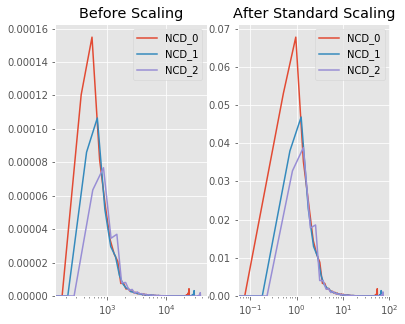

In [8]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
#sns.distplot(twitterDataReg['NCD_0'], hist=False, rug=True)
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After Standard Scaling")
#sns.distplot(X_train['NCD_0'], hist=False, rug=True)
sns.kdeplot(X_train_FR['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_2'],ax=ax2)
ax2.set_xscale('log')

In [9]:
X_train_FR1,X_test_FR1,y_train_FR1,y_test_FR1 = train_test_split(X_data,y_data,random_state = 0)
mmscaler = MinMaxScaler()
X_train_FR1 = mmscaler.fit_transform(X_train_FR1)
X_test_FR1 = mmscaler.transform(X_test_FR1)

In [10]:
X_train_FR1 = pd.DataFrame(X_train_FR1,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

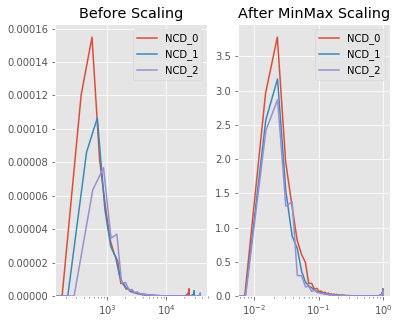

In [11]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After MinMax Scaling")
sns.kdeplot(X_train_FR1['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_2'],ax=ax2)
ax2.set_xscale('log')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_w, sampled_X, Y_w, sampled_y = train_test_split(X_data, y_data, shuffle = True, test_size = 0.01, random_state=42)
#Sampling the dataset so that it doesn't take a lot of time for processing

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sampled_X = scaler.fit_transform(sampled_X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

# Bagging Regressor

In [15]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
bag_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_dtreg.fit(X_train, y_train.values.ravel())
y_bag_dtreg_pred = bag_dtreg.predict(X_test)

In [16]:
print('Train score: {:.2f}'.format(bag_dtreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtreg.score(X_test, y_test)))

Train score: 0.70
Test score: 0.85


In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
bag_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_linsvr.fit(X_train, y_train.values.ravel())
y_bag_linsvr_pred = bag_linsvr.predict(X_test)

In [18]:
print('Train score: {:.2f}'.format(bag_linsvr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvr.score(X_test, y_test)))

Train score: 0.94
Test score: 0.92


# Pasting Regressor

In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
paste_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_dtreg.fit(X_train, y_train.values.ravel())
y_paste_dtreg_pred = paste_dtreg.predict(X_test)

In [20]:
print('Train score: {:.2f}'.format(paste_dtreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_dtreg.score(X_test, y_test)))

Train score: 0.68
Test score: 0.85


In [21]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
paste_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_linsvr.fit(X_train, y_train.values.ravel())
y_paste_linsvr_pred = paste_linsvr.predict(X_test)

In [22]:
print('Train score: {:.2f}'.format(paste_linsvr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_linsvr.score(X_test, y_test)))

Train score: 0.94
Test score: 0.92


Since pasting is without replacement, each subset of the sample can be used once at most, which means that you need
a big dataset for it to work. As a matter of fact, pasting was originally designed for large data-sets, when
computing power is limited. Bagging, on the other hand, can use the same subsets many times, which is great for
smaller sample sizes, in which it improves robustness. In our data set pasting can be uselful as we have large data set to work on. Both Pasting and Bagging are giving almost the same accuracies.

## AdaBoost Boosting

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)
adaboost_lassoreg = AdaBoostRegressor(lasso_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_lassoreg.fit(X_train, y_train.values.ravel())
y_adaboost_lassoreg_pred = adaboost_lassoreg.predict(X_test)

C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

In [24]:
print('Train score: {:.2f}'.format(adaboost_lassoreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_lassoreg.score(X_test, y_test)))

Train score: 0.83
Test score: 0.30


In [25]:
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)
adaboost_ridgereg = AdaBoostRegressor(ridge_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_ridgereg.fit(X_train, y_train.values.ravel())
y_adaboost_ridgereg_pred = adaboost_ridgereg.predict(X_test)

In [26]:
print('Train score: {:.2f}'.format(adaboost_ridgereg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_ridgereg.score(X_test, y_test)))

Train score: 0.73
Test score: -0.21


# Gradient Boosting

In [27]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)

gbrt_reg.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [28]:
print('Train score: {:.2f}'.format(gbrt_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt_reg.score(X_test, y_test)))

Train score: 0.92
Test score: 0.80


# PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCAtrans = pca.fit_transform(sampled_X)

We would expect minimum of 95% variation to be explained by our PCA.

In [31]:
variance_ratio=pca.explained_variance_ratio_

In [32]:
variance_ratio

array([0.5593794 , 0.10095687, 0.05949675, 0.03305011, 0.02906011,
       0.02862664, 0.02128256, 0.01790517, 0.01666619, 0.01643827,
       0.01558906, 0.01372026, 0.01310071, 0.01198931, 0.01059023,
       0.00880299])

 It appears that the best possible components for  the PCA decomposition is 16

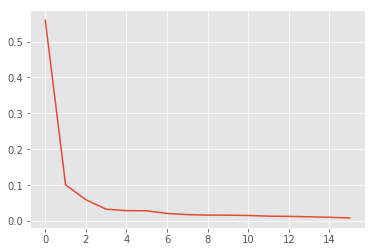

In [33]:
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

In [34]:
pca = PCA(n_components = 16)
X_PCAtrans = pca.fit_transform(sampled_X)

In [35]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

# knn Regressor using pca

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnScoring =  'r2'
param_grid = {"n_neighbors":[1,2,3,4,5]}
knnr = KNeighborsRegressor()

## Perform the grid search over the parameters
grid_knnr = GridSearchCV(estimator = knnr, param_grid = param_grid, cv = 10, scoring = knnScoring, n_jobs=-1)
grid_knnr.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [37]:
print(grid_knnr.best_estimator_.n_neighbors)
print(grid_knnr.best_score_)

2
0.8992141006665703


In [38]:
report_table = [['knnr', 'k = 5', grid_knnr.score(X_pca_train, y_pca_train), grid_knnr.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732]]

# Linear Regression with PCA

In [39]:
from sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_pca_train, y_pca_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print(lin_mod.score(X_pca_train, y_pca_train))
print(lin_mod.score(X_pca_test, y_pca_test))

0.9237318222285875
0.858380264149713


In [41]:
report_table = report_table + [['LR', '', lin_mod.score(X_pca_train, y_pca_train), lin_mod.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713]]

# SGD Regressor with PCA

In [42]:
from sklearn.linear_model import SGDRegressor
param_grid = {"max_iter":[1000,10000], "penalty":['l1','l2']}

sgd_reg = SGDRegressor(random_state=0, learning_rate = 'optimal')
grid_sgd = GridSearchCV(estimator = sgd_reg, param_grid = param_grid, cv = 10, scoring = 'r2')
grid_sgd.fit(X_pca_train, y_pca_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [43]:
print(grid_sgd.best_score_)
print(grid_sgd.best_params_)

0.7879983885435735
{'max_iter': 10000, 'penalty': 'l1'}


In [44]:
report_table = report_table + [['SGD', 'max_iteration = 1000, penalty = l2', grid_sgd.score(X_pca_train, y_pca_train), grid_sgd.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967]]

# Ridge Regression with PCA

In [45]:
from  sklearn.linear_model import Ridge

param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_ridge = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_ridge.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [46]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.8906895557841076
{'alpha': 0.02}


In [47]:
report_table = report_table + [['Ridge', 'alpha = 0.02', grid_ridge.score(X_pca_train, y_pca_train), grid_ridge.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967],
 ['Ridge', 'alpha = 0.02', 0.9237318222281271, 0.8583804507776626]]

# LASSO Regression with PCA

In [48]:
from sklearn.linear_model import Lasso
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_lasso = GridSearchCV(Lasso(), param_grid = param_grid, cv = 10, scoring = 'r2')

grid_lasso.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [49]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.89069749058903
{'alpha': 0.02}


In [50]:
report_table = report_table + [['Lasso', 'alpha = 0.02', grid_lasso.score(X_pca_train, y_pca_train), grid_lasso.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967],
 ['Ridge', 'alpha = 0.02', 0.9237318222281271, 0.8583804507776626],
 ['Lasso', 'alpha = 0.02', 0.9237318038306759, 0.8583982644039321]]

# SVR Linear with PCA

In [51]:
from sklearn.svm import LinearSVR

param_grid  = {"C": [ 10, 100, 1000], 'epsilon':[0.01,0.1,1,10]}
grid_svl = GridSearchCV(estimator = LinearSVR(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_svl.fit(X_pca_train, y_pca_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 1000], 'epsilon': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [52]:
print(grid_svl.best_score_)
print(grid_svl.best_params_)

0.8857697468419456
{'C': 100, 'epsilon': 10}


In [53]:
report_table = report_table + [['SVR Linear', 'C = 1000, epsilon = 10', grid_svl.score(X_pca_train, y_pca_train), grid_svl.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967],
 ['Ridge', 'alpha = 0.02', 0.9237318222281271, 0.8583804507776626],
 ['Lasso', 'alpha = 0.02', 0.9237318038306759, 0.8583982644039321],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8880420393254381,
  0.8798160056046652]]

# SVM Kernel with PCA

In [54]:
from sklearn.svm import SVR
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0], 'epsilon':[0.1,1,10]}

## Define the SVM model
svm_reg = SVR(kernel='rbf') 

## Perform the grid search over the parameters

grid_svrk = GridSearchCV(estimator = svm_reg, param_grid = param_grid, cv = 10, scoring = 'r2', n_jobs=-1)
grid_svrk.fit(X_pca_train, y_pca_train)

C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.02, 0.005, 0.002], 'epsilon': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [55]:
print(grid_svrk.best_score_)
print(grid_svrk.best_params_)

0.7622095600164541
{'C': 1000, 'epsilon': 10, 'gamma': 0.002}


In [56]:
report_table = report_table + [['SVR K', 'C = 1000, epsilon = 10, gamma = 0.02', grid_svrk.score(X_pca_train, y_pca_train), grid_svrk.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967],
 ['Ridge', 'alpha = 0.02', 0.9237318222281271, 0.8583804507776626],
 ['Lasso', 'alpha = 0.02', 0.9237318038306759, 0.8583982644039321],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8880420393254381,
  0.8798160056046652],
 ['SVR K',
  'C = 1000, epsilon = 10, gamma = 0.02',
  0.7229019158626568,
  0.799577361989277]]

# Polynomial Regression with PCA

In [57]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r2_train_score_list = []
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_pca_train)
    lreg.fit(X_train_poly, y_train)
    r2_train_score_list.append(lreg.score(X_train_poly, y_train))

In [58]:
r2_train_score_list

[0.9237318222285875, 0.9643710607429034]

In [59]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_pca_train)
X_test_poly = poly.fit_transform(X_pca_test)
print(lreg.score(X_train_poly, y_pca_train))
print(lreg.score(X_test_poly, y_pca_test))

0.9643710607429034
-32.441767177868165


In [60]:
report_table = report_table + [['Polynomial Regression', 'n = 2', lreg.score(X_train_poly, y_pca_train), lreg.score(X_test_poly, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9616432937360342, 0.8215448774402732],
 ['LR', '', 0.9237318222285875, 0.858380264149713],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9150796724371206,
  0.8489177912297967],
 ['Ridge', 'alpha = 0.02', 0.9237318222281271, 0.8583804507776626],
 ['Lasso', 'alpha = 0.02', 0.9237318038306759, 0.8583982644039321],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8880420393254381,
  0.8798160056046652],
 ['SVR K',
  'C = 1000, epsilon = 10, gamma = 0.02',
  0.7229019158626568,
  0.799577361989277],
 ['Polynomial Regression', 'n = 2', 0.9643710607429034, -32.441767177868165]]

In [61]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
knnr,knnr,k = 5,0.961643,0.821545
LR,LR,,0.923732,0.858380
SGD,SGD,"max_iteration = 1000, penalty = l2",0.915080,0.848918
Ridge,Ridge,alpha = 0.02,0.923732,0.858380
Lasso,Lasso,alpha = 0.02,0.923732,0.858398
SVR Linear,SVR Linear,"C = 1000, epsilon = 10",0.888042,0.879816
SVR K,SVR K,"C = 1000, epsilon = 10, gamma = 0.02",0.722902,0.799577
Polynomial Regression,Polynomial Regression,n = 2,0.964371,-32.441767


Results from the models without PCA

Model name	Model parameter	Mean_absolute_Error(Train)	Mean_absolute_Error(Test)	Train R^2 score	Test R^2 score
0	SGDRegressor	{'alpha': 0.1, 'max_iter': 10000, 'penalty': '...	24.450220	52.548453	0.980406	0.842721
1	KnnRegressor	{'n_neighbors': 5}	36.412027	74.167653	0.779749	-1.082562
2	Ridge_Regressor	{'alpha': 100}	27.548246	52.936209	0.973022	0.819503
3	Lasso_Regressor	{'alpha': 1}	24.256527	52.405366	0.981558	0.843351
4	LinearSVR_Regressor	{'C': 10}	21.464068	52.987895	0.980753	0.832866
5	SVR_Regressor	{'C': 1000, 'gamma': 0.01}	25.272350	98.075151	0.615921	-4.760704
6	RandomForest	{'bootstrap': True, 'min_samples_leaf': 10, 'n...	44.931513	82.958101	0.548026	-1.244657

In [ ]:
With PCA we are getting more robust models than without using PCA. 

# Neural Network Model for Regression

In [62]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

C:\Users\shmbh\Anaconda4\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [63]:
model = Sequential()
model.add(Dense(13, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam' , metrics = ['mean_squared_error'])

In [64]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
4083/4083 [==============================] - 0s 115us/step - loss: 460302.0084 - mean_squared_error: 460302.0084
Epoch 2/100
4083/4083 [==============================] - 0s 51us/step - loss: 452787.2966 - mean_squared_error: 452787.2966
Epoch 3/100
4083/4083 [==============================] - 0s 52us/step - loss: 436090.1116 - mean_squared_error: 436090.1116
Epoch 4/100
4083/4083 [==============================] - 0s 48us/step - loss: 411315.0324 - mean_squared_error: 411315.0324
Epoch 5/100
4083/4083 [==============================] - 0s 49us/step - loss: 377066.7037 - mean_squared_error: 377066.7037
Epoch 6/100
4083/4083 [==============================] - 0s 43us/step - loss: 314754.5708 - mean_squared_error: 314754.5708
Epoch 7/100
4083/4083 [==============================] - 0s 48us/step - loss: 234263.6651 - mean_squared_error: 234263.6651
Epoch 8/100
4083/4083 [==============================] - 0s 50us/step - loss: 181536.5175 - mean_squared_error: 181536.5175
Epoch 9

4083/4083 [==============================] - 0s 43us/step - loss: 30357.8324 - mean_squared_error: 30357.8324
Epoch 68/100
4083/4083 [==============================] - 0s 56us/step - loss: 30477.2866 - mean_squared_error: 30477.2866
Epoch 69/100
4083/4083 [==============================] - 0s 49us/step - loss: 30383.9582 - mean_squared_error: 30383.9582
Epoch 70/100
4083/4083 [==============================] - 0s 54us/step - loss: 30159.1515 - mean_squared_error: 30159.1515
Epoch 71/100
4083/4083 [==============================] - 0s 58us/step - loss: 30226.0228 - mean_squared_error: 30226.0228
Epoch 72/100
4083/4083 [==============================] - 0s 54us/step - loss: 29800.4894 - mean_squared_error: 29800.4894
Epoch 73/100
4083/4083 [==============================] - 0s 54us/step - loss: 29645.1140 - mean_squared_error: 29645.1140
Epoch 74/100
4083/4083 [==============================] - 0s 50us/step - loss: 29716.1117 - mean_squared_error: 29716.1117
Epoch 75/100
4083/4083 [=====

In [65]:
model.evaluate(X_test, y_test)

1750/1750 [==============================] - 0s 27us/step


[17375.691688337054, 17375.691688337054]

In [66]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.94
Test score: 0.89
